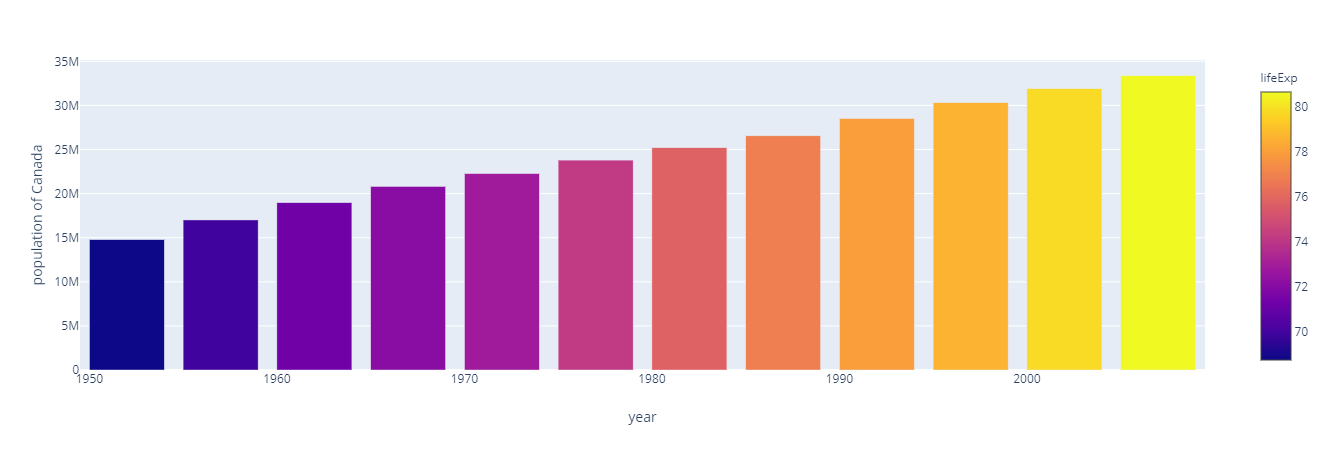

In [3]:
import plotly.express as px
data = px.data.gapminder()

data_canada = data[data.country == 'Canada']
fig = px.bar(data_canada, x='year', y='pop',
             hover_data=['lifeExp', 'gdpPercap'], color='lifeExp',
             labels={'pop':'population of Canada'}, height=400)
fig.show()

In [29]:
import numpy as np
import k3d
plot = k3d.plot(camera_auto_fit=False)
N = 10000
traj = np.cumsum(np.random.randn(N,3).astype(np.float32),axis=0)
plt_line = k3d.line(traj, shader='mesh', width=0.5)
plt_line2 = k3d.line([traj[0],traj[-1]],shader='mesh', width=2.5, color=0xff0000)
plot += plt_line
plot += plt_line2
plot.display()

Output()

In [27]:
output_notebook()
import numpy as np # we will use this later, so import it now

from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.sampledata.glucose import data


# reduce data size to one week
week = data.loc['2010-10-01':'2010-10-08']

p = figure(x_axis_type="datetime", title="Glocose Range", plot_height=350, plot_width=800)
p.xgrid.grid_line_color=None
p.ygrid.grid_line_alpha=0.5
p.xaxis.axis_label = 'Time'
p.yaxis.axis_label = 'Value'

p.line(week.index, week.glucose)

show(p)

Loading BokehJS ...

In [28]:
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral6

fruits = ['Apples', 'Pears', 'Nectarines', 'Plums', 'Grapes', 'Strawberries']
counts = [5, 3, 4, 2, 4, 6]

source = ColumnDataSource(data=dict(fruits=fruits, counts=counts, color=Spectral6))

p = figure(x_range=fruits, plot_height=250, y_range=(0, 9), title="Fruit Counts")
p.vbar(x='fruits', top='counts', width=0.9, color='color', legend="fruits", source=source)

p.xgrid.grid_line_color = None
p.legend.orientation = "horizontal"
p.legend.location = "top_center"

show(p)
from bokeh.models import FactorRange

fruits = ['Apples', 'Pears', 'Nectarines', 'Plums', 'Grapes', 'Strawberries']
years = ['2015', '2016', '2017']

data = {'fruits' : fruits,
        '2015'   : [2, 1, 4, 3, 2, 4],
        '2016'   : [5, 3, 3, 2, 4, 6],
        '2017'   : [3, 2, 4, 4, 5, 3]}

# this creates [ ("Apples", "2015"), ("Apples", "2016"), ("Apples", "2017"), ("Pears", "2015), ... ]
x = [ (fruit, year) for fruit in fruits for year in years ]
counts = sum(zip(data['2015'], data['2016'], data['2017']), ()) # like an hstack

source = ColumnDataSource(data=dict(x=x, counts=counts))

p = figure(x_range=FactorRange(*x), plot_height=250, title="Fruit Counts by Year")

p.vbar(x='x', top='counts', width=0.9, source=source)

p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xaxis.major_label_orientation = 1
p.xgrid.grid_line_color = None

show(p)
from bokeh.transform import factor_cmap

p = figure(x_range=FactorRange(*x), plot_height=250, title="Fruit Counts by Year")

p.vbar(x='x', top='counts', width=0.9, source=source, line_color="white",

       # use the palette to colormap based on the the x[1:2] values
       fill_color=factor_cmap('x', palette=['firebrick', 'olive', 'navy'], factors=years, start=1, end=2))

p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xaxis.major_label_orientation = 1
p.xgrid.grid_line_color = None

show(p)

In [8]:
from IPython.display import IFrame
IFrame(src= "https://dash-simple-apps.plotly.host/dash-barplot/", width="100%", height="650px", frameBorder="0")


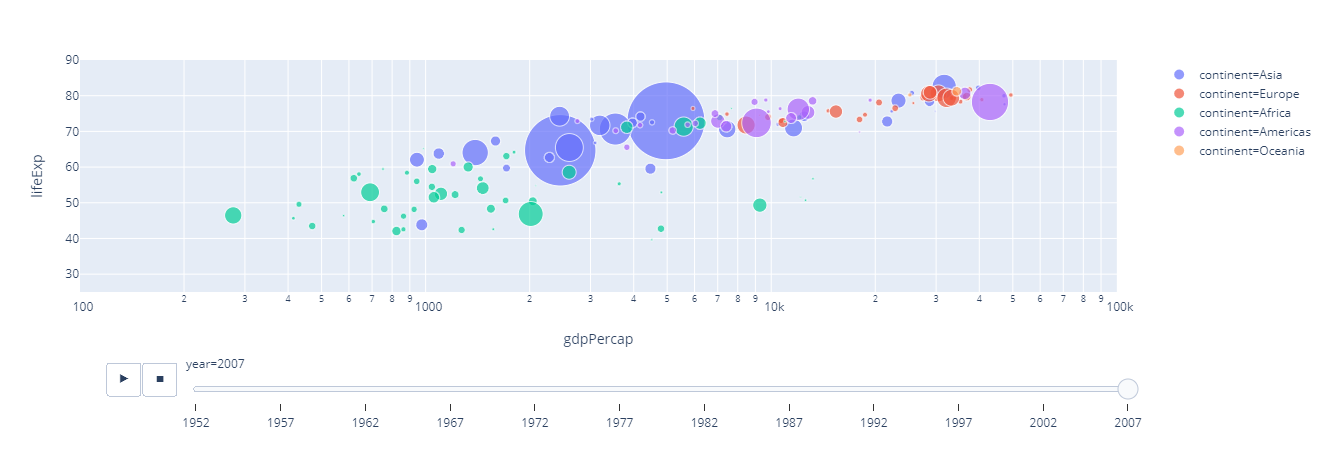

In [5]:
import plotly.express as px
gapminder = px.data.gapminder()
px.scatter(gapminder, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])

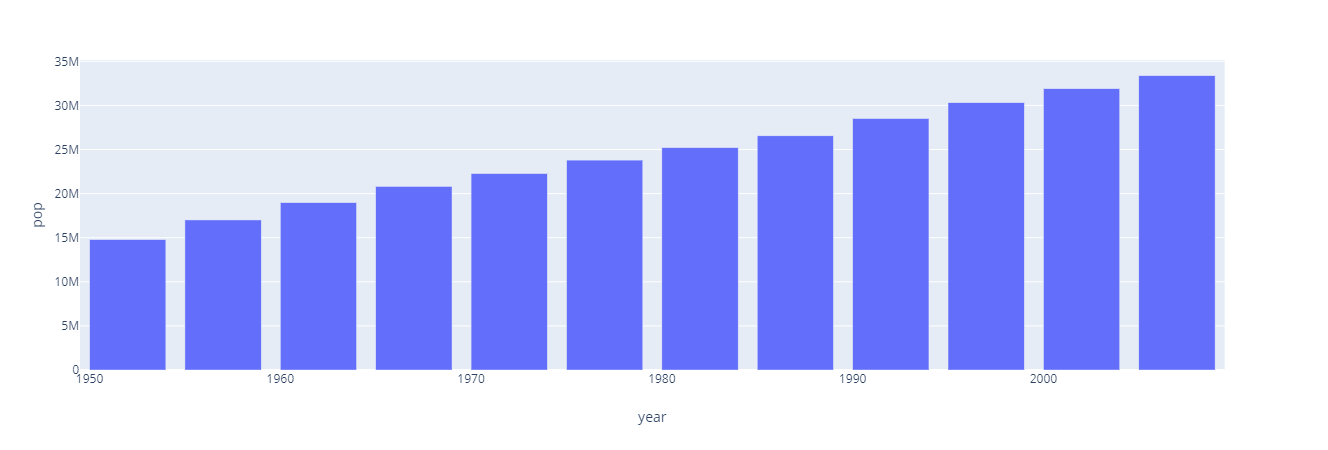

In [7]:
import plotly.express as px
data_canada = px.data.gapminder().query("country == 'Canada'")
fig = px.bar(data_canada, x='year', y='pop')
fig.show()

In [19]:
import plotly.express as px
iris = px.data.iris()
fig = px.scatter_3d(iris, x='sepal_length', y='sepal_width', z='petal_width',
              color='petal_length', size='petal_length', size_max=18,
              symbol='species', opacity=0.7)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))